In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
state0 = pd.read_csv("states0.csv").drop("Unnamed: 0",axis=1)
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


In [24]:
print(state0.head())  # Check first few rows
print(state0.columns)  # Check column names
print(state0.dtypes)  # Check data types

        State  TotalPop   Hispanic               White               Black  \
0     Alabama   4830620   3.751616     61.878656462585   31.25297619047618   
1      Alaska    733375   5.909581  60.910179640718574  2.8485029940119775   
2     Arizona   6641928  29.565921  57.120000000000026  3.8509868421052658   
3    Arkansas   2958208   6.215474   71.13781021897813  18.968759124087573   
4  California  38421464  37.291875   40.21578881677474   5.677396405391911   

                Native               Asian              Pacific  \
0   0.4532312925170065  1.0502551020408146  0.03435374149659865   
1    16.39101796407186   5.450299401197604   1.0586826347305378   
2     4.35506578947368   2.876578947368419  0.16763157894736833   
3   0.5229197080291965  1.1423357664233578  0.14686131386861315   
4  0.40529206190713685  13.052234148776776  0.35141038442336353   

               Income            GenderPop     males   females  
0  $43296.35860306644    2341093M_2489527F   2341093   2489527 

# 1. Cleaning the Income Column

In [60]:
# Remove the dollar sign and convert to float
state0['Income'] = state0['Income'].replace({'\$': ''}, regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\kk\AppData\Local\Temp\ipykernel_5244\2534793170.py:2: SyntaxWarning: invalid escape sequence '\$'
  state0['Income'] = state0['Income'].replace({'\$': ''}, regex=True).astype(float)


In [62]:
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,males,females,Males,Females,Female Proportion,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527,2341093.0,2489527.0,0.515364,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215,384160.0,349215.0,0.476175,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840,3299088.0,3342840.0,0.503294,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295,1451913.0,1506295.0,0.509192,1451913.0,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329,19087135.0,19334329.0,0.503217,19087135.0,19334329.0
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,NaN,64657.801787,2648667M_2630239F,2648667,2630239,2648667.0,2630239.0,0.498255,2648667.0,2630239.0


In [4]:
state0.Hispanic = state0.Hispanic.str.replace("%","").astype(float)

In [5]:
state0.White = state0.White.str[:-1]
state0.Black = state0.Black.str[:-1]
state0.Native = state0.Native.str[:-1]
state0.Asian = state0.Asian.str[:-1]
state0.Pacific = state0.Pacific.str[:-1]

In [6]:
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.751616,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909581,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291875,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.784380,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,$64657.801787164906,2648667M_2630239F


In [8]:
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,males,females
0,Alabama,4830620,3.751616,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,$43296.35860306644,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909581,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,$70354.74390243902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,$54207.82095490716,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,$41935.63396778917,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291875,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,$67264.78230266465,19087135M_19334329F,19087135,19334329
5,Colorado,5278906,20.784380,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,$64657.801787164906,2648667M_2630239F,2648667,2630239


In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Females')

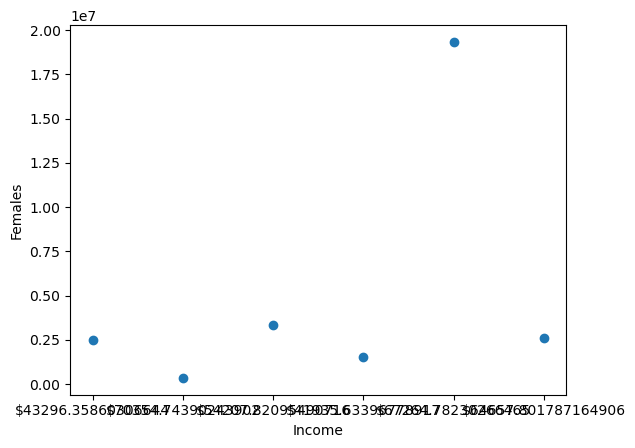

In [10]:
plt.scatter(x=state0.Income, y=state0.females)
plt.xlabel("Income")
plt.ylabel("Females")


# 2. Splitting the GenderPop Column


In [58]:
# Split into two columns: one for men and one for women
state0[['Men', 'Women']] = state0['GenderPop'].str.split("_", expand=True)

# Remove the 'M' and 'F' characters and convert to numeric
state0['Men'] = state0['Men'].str.replace('M', '', regex=False).astype(float)
state0['Women'] = state0['Women'].str.replace('F', '', regex=False).astype(float)


In [64]:
state0['Women'] = state0['Women'].fillna(state0['TotalPop'] - state0['Men'])


In [66]:
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,males,females,Males,Females,Female Proportion,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527,2341093.0,2489527.0,0.515364,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215,384160.0,349215.0,0.476175,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840,3299088.0,3342840.0,0.503294,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295,1451913.0,1506295.0,0.509192,1451913.0,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329,19087135.0,19334329.0,0.503217,19087135.0,19334329.0
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,NaN,64657.801787,2648667M_2630239F,2648667,2630239,2648667.0,2630239.0,0.498255,2648667.0,2630239.0


# Step 3: Handle Missing Values


In [38]:
state0['Females'].fillna(state0['TotalPop'] - state0['Males'], inplace=True)


C:\Users\kk\AppData\Local\Temp\ipykernel_5244\2085763450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  state0['Females'].fillna(state0['TotalPop'] - state0['Males'], inplace=True)


In [40]:
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,males,females,Males,Females
0,Alabama,4830620,3.751616,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.358603,2341093M_2489527F,2341093,2489527,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.743902,384160M_349215F,384160,349215,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.820955,3299088M_3342840F,3299088,3342840,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.633968,1451913M_1506295F,1451913,1506295,1451913.0,1506295.0
4,California,38421464,37.291875,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.782303,19087135M_19334329F,19087135,19334329,19087135.0,19334329.0
5,Colorado,5278906,20.784380,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787,2648667M_2630239F,2648667,2630239,2648667.0,2630239.0


# Step 4: Remove Duplicates


In [46]:
state0.drop_duplicates(inplace=True)

# Step 5: Scatter Plot (Income vs Proportion of Women)


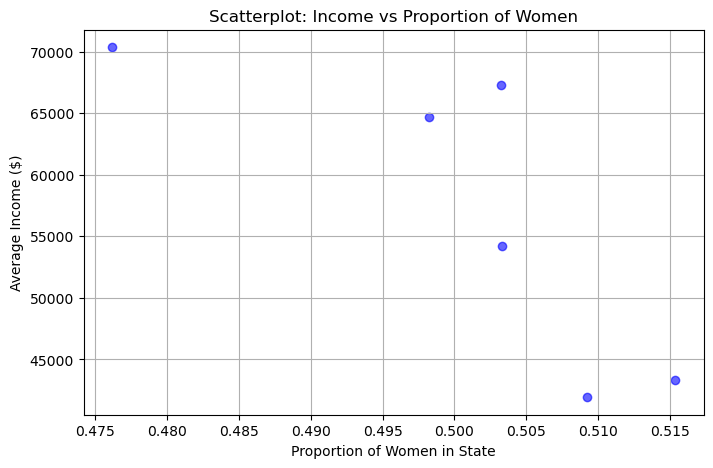

In [80]:
import matplotlib.pyplot as plt

# Calculate the proportion of women in each state
state0['Women_Proportion'] = state0['Women'] / state0['TotalPop']

# Create the scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(state0['Women_Proportion'], state0['Income'], color='blue', alpha=0.6)
plt.xlabel("Proportion of Women in State")
plt.ylabel("Average Income ($)")
plt.title("Scatterplot: Income vs Proportion of Women")
plt.grid(True)
plt.show()


# Step 6: Histograms for Race Data


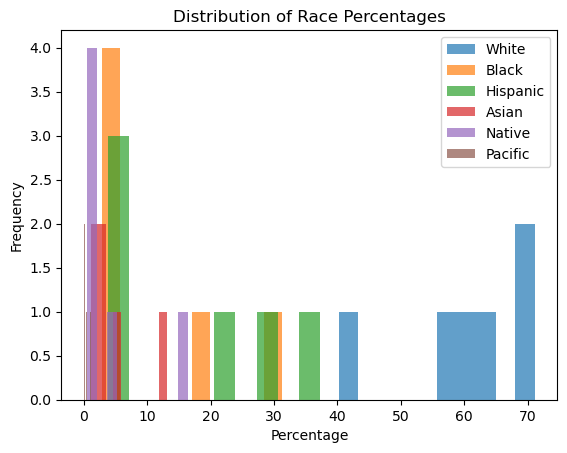

In [84]:
race_columns = ["White", "Black", "Hispanic", "Asian", "Native", "Pacific"]

for col in race_columns:
    if state0[col].dtype == object:  # Check if the column is of string type
        state0[col] = state0[col].str.replace("%", "").astype(float)  # Remove '%' and convert to float
    plt.hist(state0[col], bins=10, alpha=0.7, label=col)

plt.legend()
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Race Percentages')
plt.show()

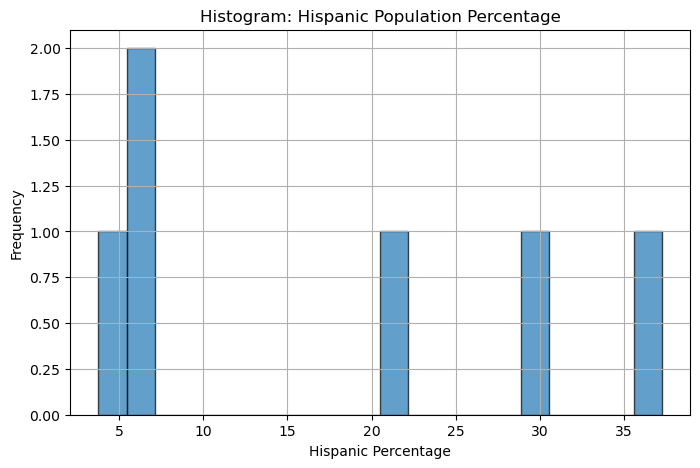

In [86]:
plt.figure(figsize=(8, 5))
plt.hist(state0['Hispanic'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Hispanic Percentage")
plt.ylabel("Frequency")
plt.title("Histogram: Hispanic Population Percentage")
plt.grid(True)
plt.show()


# 7. Clean the Racial Percentage Columns


In [69]:
race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in race_columns:
    state0[col] = state0[col].replace({'%': ''}, regex=True).astype(float)


In [71]:
state0['Pacific'] = state0['Pacific'].fillna(0)


In [73]:
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,males,females,Males,Females,Female Proportion,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527,2341093.0,2489527.0,0.515364,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215,384160.0,349215.0,0.476175,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840,3299088.0,3342840.0,0.503294,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295,1451913.0,1506295.0,0.509192,1451913.0,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329,19087135.0,19334329.0,0.503217,19087135.0,19334329.0
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000,64657.801787,2648667M_2630239F,2648667,2630239,2648667.0,2630239.0,0.498255,2648667.0,2630239.0


# 8. Remove Duplicate Rows


In [76]:
# Check for duplicates
print("Number of duplicate rows:", state0.duplicated().sum())

# Drop duplicates
state0 = state0.drop_duplicates()


Number of duplicate rows: 0


# 9. Side-by-Side Subplots for Different Racial Groups


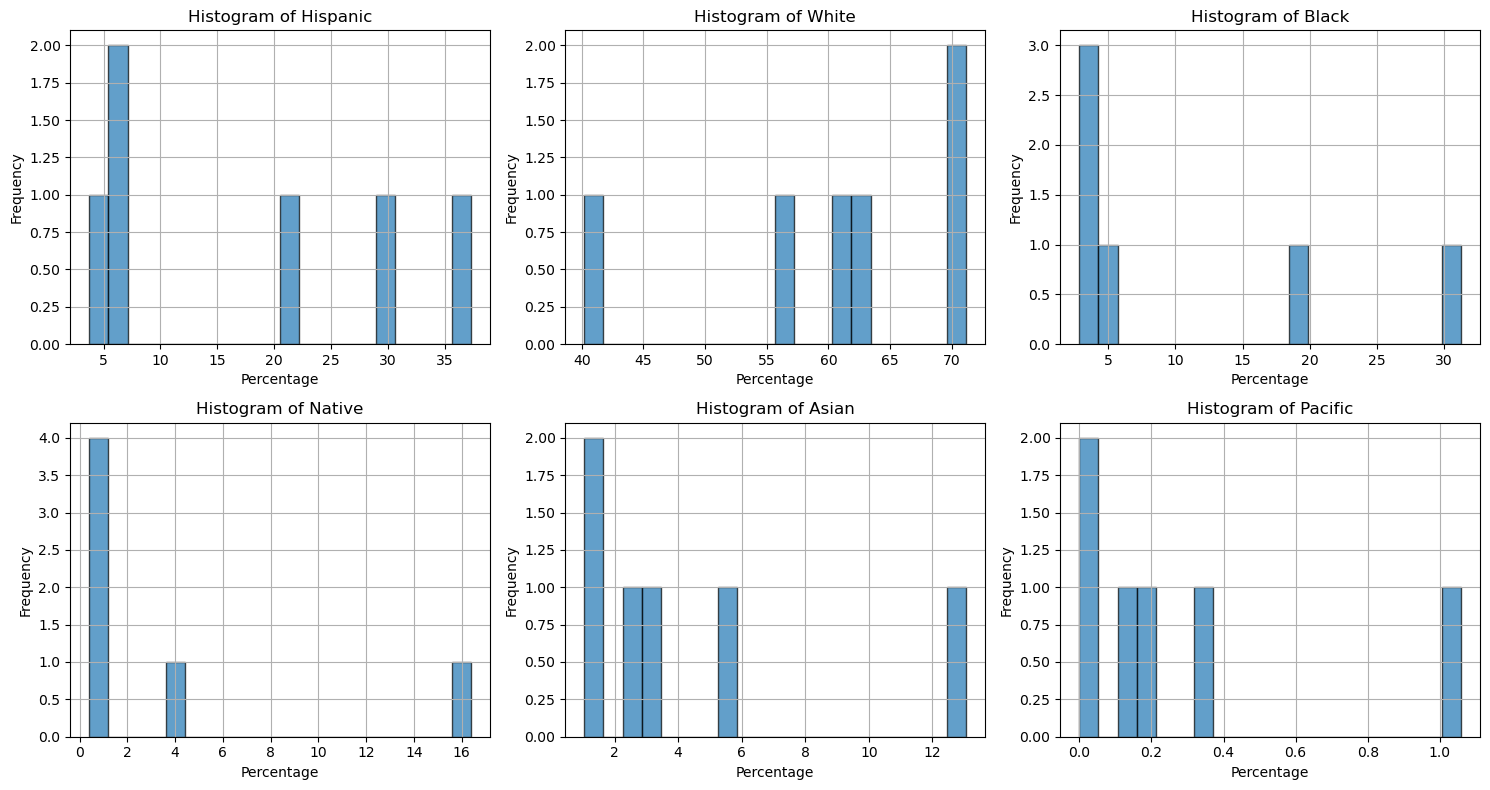

In [90]:
import matplotlib.pyplot as plt

# List of racial columns
race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

# Create a 2x3 subplot for the six racial groups
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(race_columns):
    axes[i].hist(state0[col], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Percentage')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


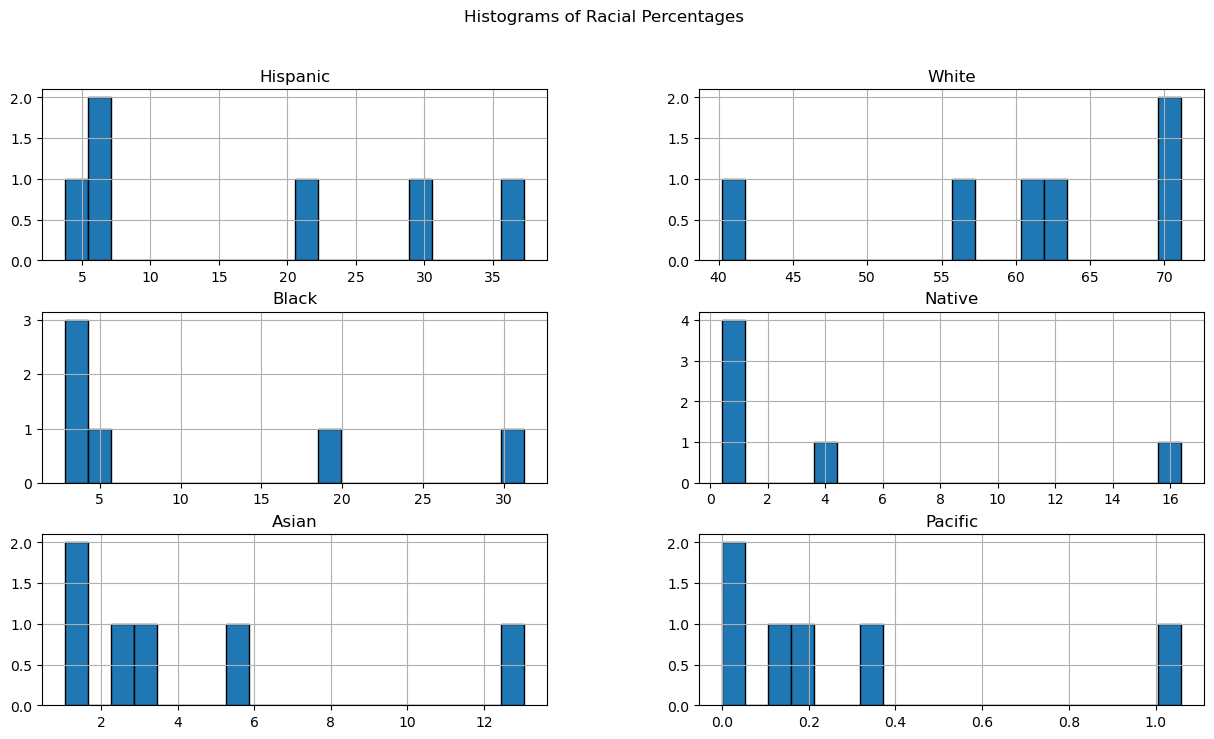

In [95]:
# Generate histograms for all racial columns at once
state0[race_columns].hist(bins=20, figsize=(15, 8), edgecolor='black')
plt.suptitle("Histograms of Racial Percentages")
plt.show()


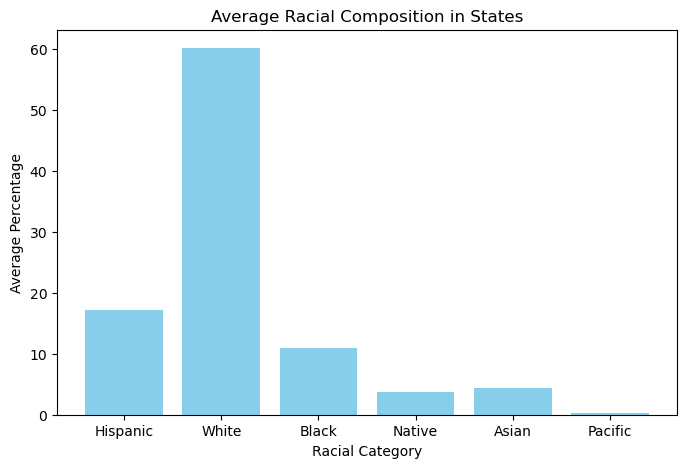

In [97]:
# Calculate mean percentages for each racial group
mean_values = state0[race_columns].mean()

plt.figure(figsize=(8, 5))
plt.bar(mean_values.index, mean_values.values, color='skyblue')
plt.xlabel("Racial Category")
plt.ylabel("Average Percentage")
plt.title("Average Racial Composition in States")
plt.show()


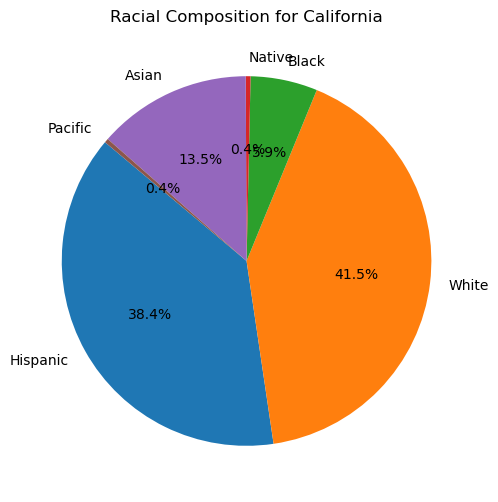

In [99]:
# Select the data for a specific state (e.g., California)
state_data = state0[state0['State'] == 'California'].iloc[0]
labels = race_columns
sizes = [state_data[col] for col in race_columns]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Racial Composition for California")
plt.show()
